# <font color='black'> Portfolio Management using Markowitz Model
Portfolio management using the Markowitz Model, also known as Modern Portfolio Theory (MPT), is a widely used approach to build and manage investment portfolios that aim to achieve an optimal balance between risk and return. Here are the key steps and concepts involved in implementing the Markowitz Model for portfolio management:

__Asset Selection__: Start by selecting a set of assets or investments in which you want to construct a portfolio. These assets can include stocks, bonds, mutual funds, or any other financial instruments.

__Data Collection__: Gather historical data on the selected assets, including their returns and the correlations between their returns. This data is essential for calculating the expected returns and the risk associated with each asset.

__Expected Returns__: Calculate the expected return for each asset in your portfolio. This is typically done by analyzing historical returns, financial indicators, and market conditions. The expected return represents the mean or average return an asset is expected to generate.

__Risk Assessment__: Measure the risk associated with each asset by calculating its variance or standard deviation. High variance indicates higher risk, while low variance indicates lower risk.

__Efficient Frontier__: The core idea of the Markowitz Model is to find the optimal combination of assets that maximizes returns for a given level of risk or minimizes risk for a given level of return. This results in the construction of an efficient frontier, which is a graphical representation of various portfolios with different risk-return profiles.

__Portfolio Optimization__: Using mathematical optimization techniques, such as the Mean-Variance Optimization, you can determine the allocation of assets in your portfolio that falls on the efficient frontier and best suits your risk-return preferences. The goal is to select a portfolio that provides the highest expected return for a given level of risk or the lowest risk for a given level of return.

The Markowitz Model provides a systematic framework for constructing portfolios that optimize the trade-off between risk and return. It's important to note that it has its limitations and assumptions, such as the assumption that returns follow a normal distribution. Additionally, real-world implementation may involve transaction costs, taxes, and other practical considerations that need to be taken into account.
   

## <font color='black'> **Importing Libraries**</font>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install yfinance
import yfinance as yf

## <font color='black'>Identifying stocks and fetching their closing price </font>

In [3]:
NUM_TRADING_DAYS = 252

NUM_STIMULATIONS = 100000

stocks = ["RELIANCE.NS", "TCS.NS", "HINDUNILVR.NS", "HDFCBANK.NS", "ITC.NS", "LT.NS", "INFY.NS"]

start_date = "2018-10-01"
end_date = "2023-10-01"

In [4]:
stock_data = {}

for i in stocks:
    ticker = yf.Ticker(i)
    stock_data[i] = ticker.history(start = start_date, end = end_date)['Close']
    
stock_prices = pd.DataFrame(stock_data)

In [5]:
stock_prices

,RELIANCE.NS,TCS.NS,HINDUNILVR.NS,HDFCBANK.NS,ITC.NS,LT.NS,INFY.NS
Date,,,,,,,
2018-10-01 00:00:00+05:30,1197.153320,2024.673828,1513.858521,982.032654,246.232300,1140.846191,645.737244
2018-10-03 00:00:00+05:30,1171.299316,1941.462769,1492.242432,979.958069,244.657608,1138.423706,630.040100
2018-10-04 00:00:00+05:30,1090.773071,1853.449219,1450.853760,944.545166,237.944427,1149.803955,611.619019
2018-10-05 00:00:00+05:30,1019.431763,1887.424683,1436.658569,948.187744,229.159302,1121.925049,626.667236
2018-10-08 00:00:00+05:30,1078.283569,1864.894287,1437.395752,938.393677,226.424301,1110.910522,617.889099
...,...,...,...,...,...,...,...
2023-09-25 00:00:00+05:30,2340.449951,3577.149902,2475.850098,1531.000000,442.600006,2902.500000,1474.150024
2023-09-26 00:00:00+05:30,2342.500000,3585.699951,2478.949951,1537.650024,442.450012,2912.550049,1460.650024
2023-09-27 00:00:00+05:30,2368.899902,3589.300049,2501.750000,1526.849976,449.149994,2965.050049,1467.000000


## <font color='black'> Calculating returns and volatilty of stocks </font>

In [6]:
# Calculating daily log returns for each stock
log_returns = np.log(stock_prices / stock_prices.shift(1))

In [7]:
log_returns = log_returns.dropna()
log_returns

,RELIANCE.NS,TCS.NS,HINDUNILVR.NS,HDFCBANK.NS,ITC.NS,LT.NS,INFY.NS
Date,,,,,,,
2018-10-03 00:00:00+05:30,-0.021833,-0.041967,-0.014382,-0.002115,-0.006416,-0.002126,-0.024609
2018-10-04 00:00:00+05:30,-0.071227,-0.046393,-0.028128,-0.036806,-0.027823,0.009947,-0.029674
2018-10-05 00:00:00+05:30,-0.067641,0.018165,-0.009832,0.003849,-0.037620,-0.024545,0.024306
2018-10-08 00:00:00+05:30,0.056125,-0.012009,0.000513,-0.010383,-0.012007,-0.009866,-0.014107
2018-10-09 00:00:00+05:30,-0.017596,0.006835,-0.030538,-0.002265,-0.017353,0.004679,0.004608
...,...,...,...,...,...,...,...
2023-09-25 00:00:00+05:30,-0.006176,-0.007381,-0.002662,0.000882,-0.001129,-0.005497,-0.014814
2023-09-26 00:00:00+05:30,0.000876,0.002387,0.001251,0.004334,-0.000339,0.003457,-0.009200
2023-09-27 00:00:00+05:30,0.011207,0.001004,0.009155,-0.007049,0.015029,0.017865,0.004338


In [8]:
print('Stock        Annualised Return')
print(log_returns.mean()*NUM_TRADING_DAYS)

Stock        Annualised Return
RELIANCE.NS      0.137190
TCS.NS           0.113347
HINDUNILVR.NS    0.099529
HDFCBANK.NS      0.089981
ITC.NS           0.120480
LT.NS            0.198878
INFY.NS          0.163002
dtype: float64


In [9]:
print('Stock           Volatility')
print(np.std(log_returns) * np.sqrt(NUM_TRADING_DAYS))

Stock           Volatility
RELIANCE.NS      0.313827
TCS.NS           0.252968
HINDUNILVR.NS    0.238505
HDFCBANK.NS      0.269949
ITC.NS           0.264925
LT.NS            0.283866
INFY.NS          0.292385
dtype: float64


## <font color='black'>Monte Carlo Stimulation </font>

In [10]:
portfolio_weights = []
portfolio_returns = []
portfolio_risk = []

In [11]:
for _ in range (NUM_STIMULATIONS):
    w = np.random.random(len(stocks))
    w /= np.sum(w)
    portfolio_weights.append(w)
    p_return = np.sum(log_returns.mean()*w) * NUM_TRADING_DAYS
    portfolio_returns.append(p_return)
    p_risk = np.sqrt(np.dot(w.T, np.dot(log_returns.cov() * NUM_TRADING_DAYS, w)))
    portfolio_risk.append(p_risk)

In [12]:
portfolio_weights = np.array(portfolio_weights)
portfolio_returns = np.array(portfolio_returns)
portfolio_risk = np.array(portfolio_risk)

In [13]:
portfolios = pd.DataFrame({"Returns" : portfolio_returns, "Risk" : portfolio_risk, "Sharpe Ratio" : portfolio_returns/portfolio_risk})

In [14]:
portfolios

,Returns,Risk,Sharpe Ratio
0,0.136627,0.189893,0.719494
1,0.125311,0.175114,0.715597
2,0.147505,0.188881,0.780943
3,0.138440,0.186459,0.742468
4,0.127472,0.181140,0.703722
...,...,...,...
99995,0.124173,0.182231,0.681404
99996,0.136628,0.189272,0.721863
99997,0.135195,0.185234,0.729861
99998,0.129213,0.183013,0.706034


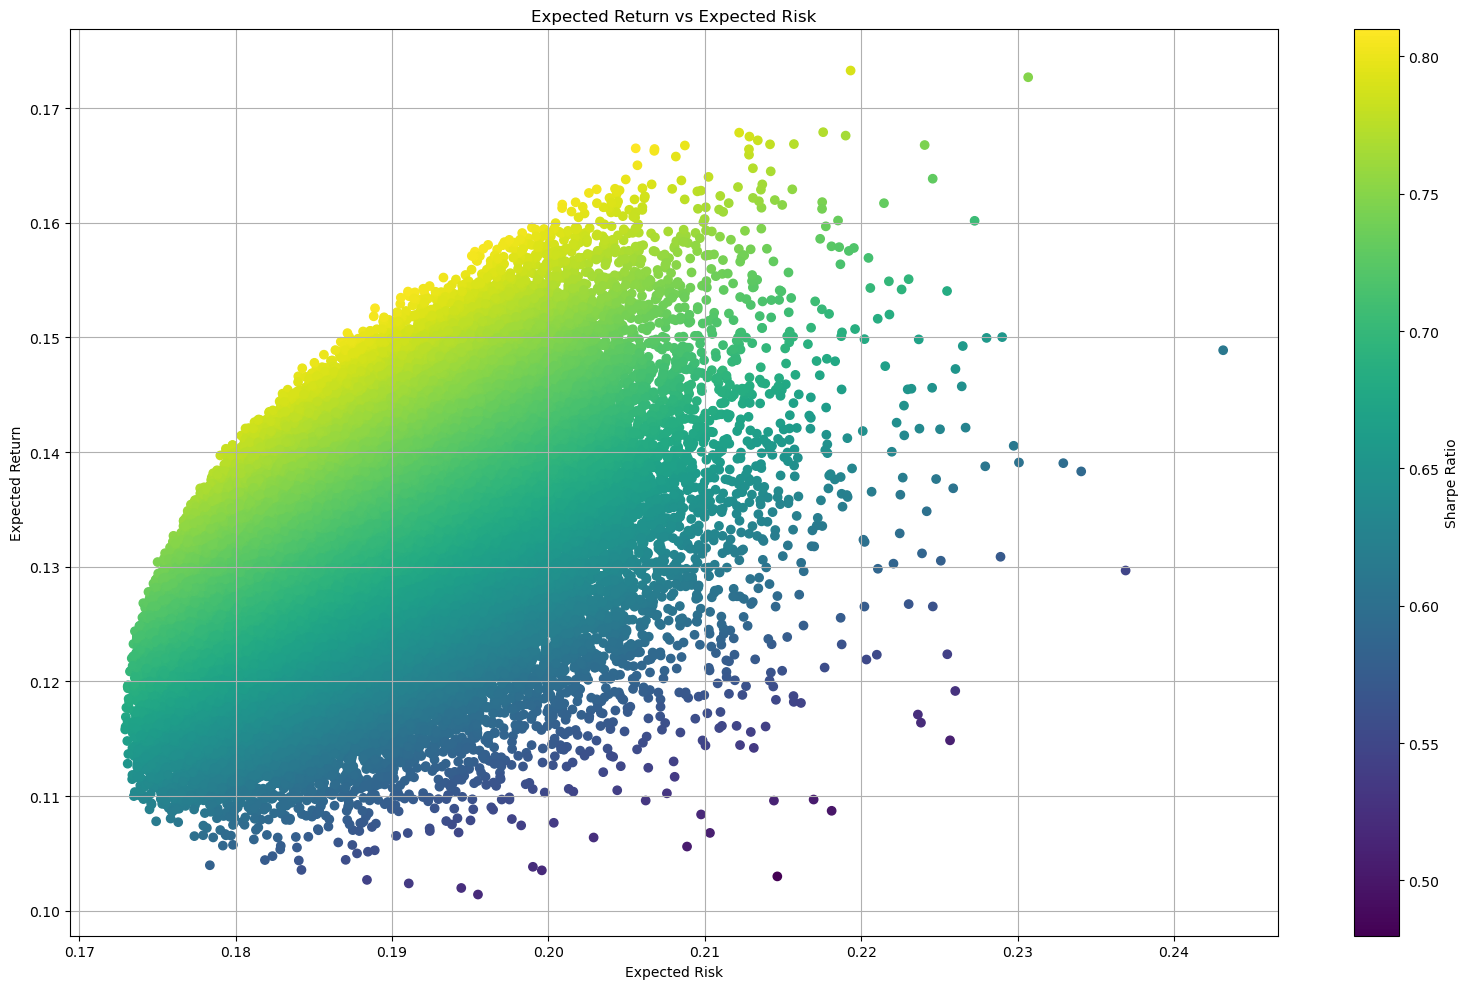

In [15]:
# Plotting the Expected return vs Expected risk for ech portfolio generated
plt.figure(figsize = (16,10)) 
plt.scatter(portfolio_risk, portfolio_returns, c = portfolio_returns/portfolio_risk, marker = 'o')
plt.grid(True)
plt.xlabel('Expected Risk')
plt.ylabel('Expected Return')
plt.colorbar(label = "Sharpe Ratio")
plt.title('Expected Return vs Expected Risk')
plt.tight_layout()

In [16]:
# Calculating sharpe ratio for each generated portfolio
sharpe_ratios = portfolio_returns/portfolio_risk

## <font color='black'> Portfolio corresponding to maximum sharpe ratio </font>

In [17]:
ind = 0
for i in range(len(sharpe_ratios)):
    if(sharpe_ratios[i] == np.max(sharpe_ratios)):
        ind = i

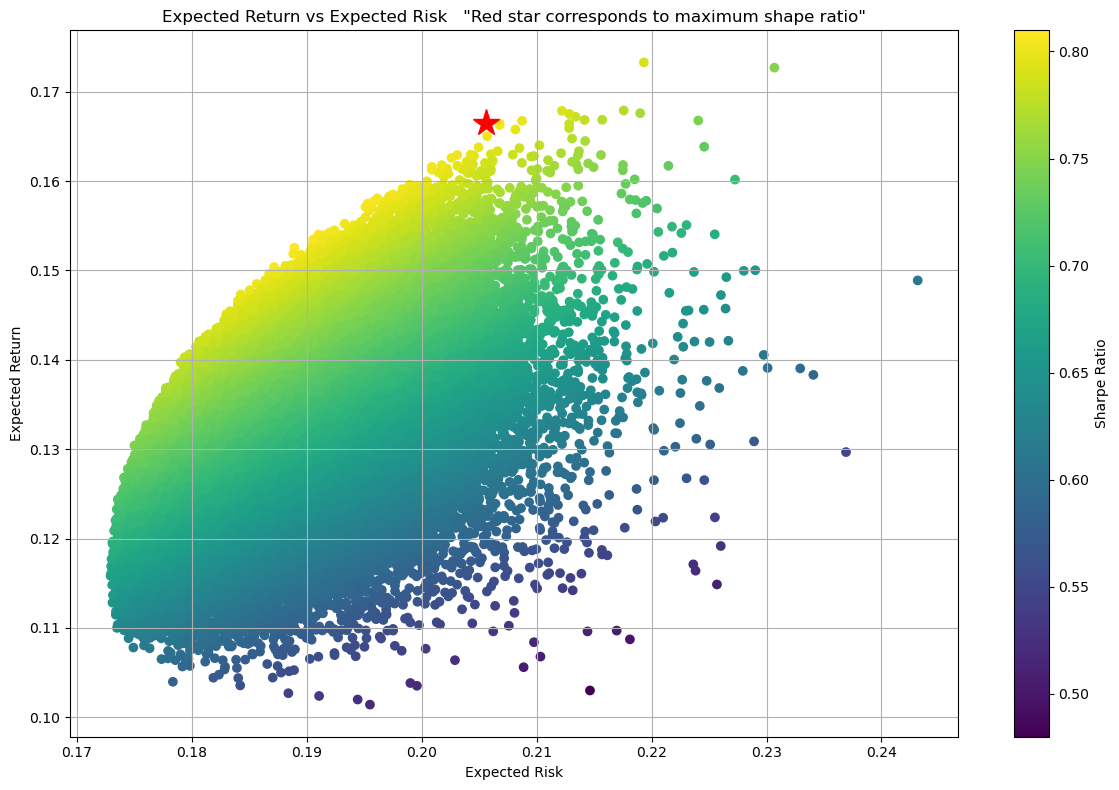

In [18]:
plt.figure(figsize = (12,8)) 
plt.scatter(portfolio_risk, portfolio_returns, c = portfolio_returns/portfolio_risk, marker = "o")
plt.grid(True)
plt.xlabel('Expected Risk')
plt.ylabel('Expected Return')
plt.colorbar(label = "Sharpe Ratio")
plt.plot(portfolio_risk[ind], portfolio_returns[ind], 'r*', markersize = 20.0)
plt.title('Expected Return vs Expected Risk   "Red star corresponds to maximum shape ratio"')
plt.tight_layout()

In [19]:
print("Sharpe ratio of the portfolio is", np.round(sharpe_ratios[ind], 5))

Sharpe ratio of the portfolio is 0.80988


In [20]:
print("Expected return of the portfolio is", np.round(portfolio_returns[ind]*100),"%")

Expected return of the portfolio is 17.0 %


In [21]:
print("Expected Risk of the portfolio is", np.round(portfolio_risk[ind], 5))

Expected Risk of the portfolio is 0.20558


In [22]:
print('Stocks with the corresponding weights')
for i in range(len(stocks)):
    print(stocks[i],"-->",np.round(portfolio_weights[ind][i], 5))

Stocks with the corresponding weights
RELIANCE.NS --> 0.03338
TCS.NS --> 0.00575
HINDUNILVR.NS --> 0.0901
HDFCBANK.NS --> 0.01554
ITC.NS --> 0.12079
LT.NS --> 0.46359
INFY.NS --> 0.27087


## <font color='black'> Portfolio corresponding to minimum risk </font>

In [23]:
ind = 0
for i in range(len(portfolio_risk)):
    if(portfolio_risk[i] == np.min(portfolio_risk)):
        ind = i

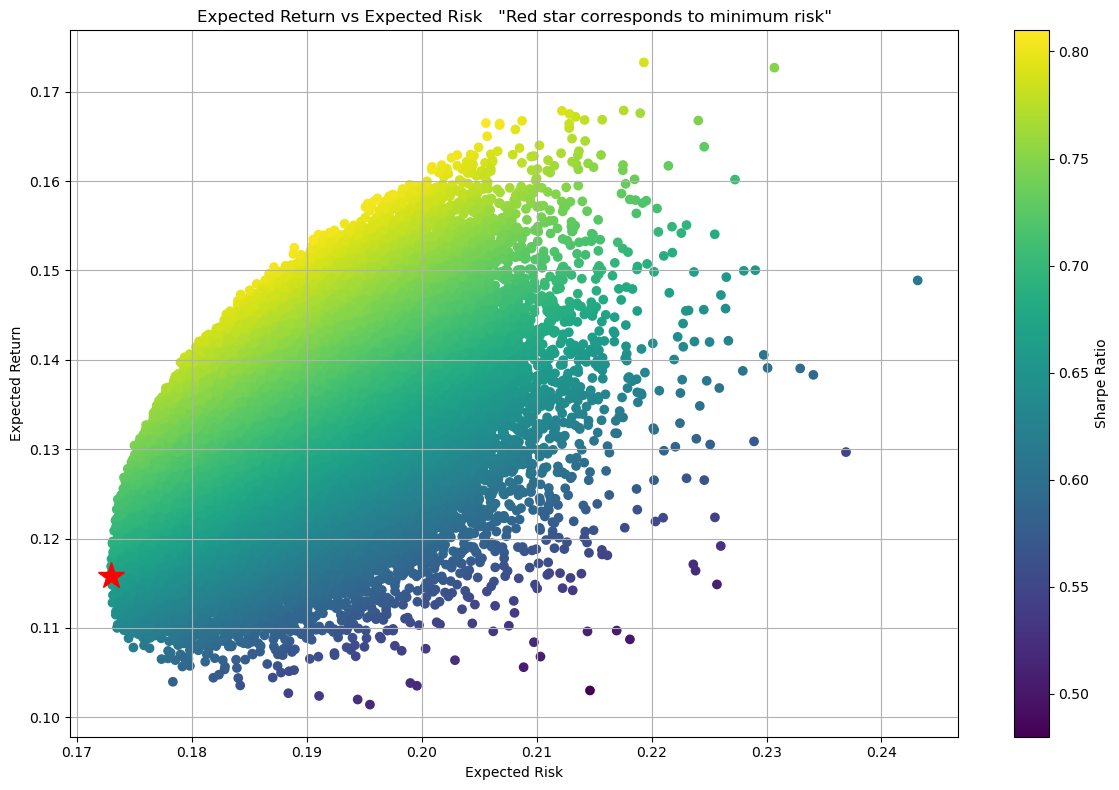

In [24]:
plt.figure(figsize = (12,8)) 
plt.scatter(portfolio_risk, portfolio_returns, c = portfolio_returns/portfolio_risk, marker = "o")
plt.grid(True)
plt.xlabel('Expected Risk')
plt.ylabel('Expected Return')
plt.colorbar(label = "Sharpe Ratio")
plt.plot(portfolio_risk[ind], portfolio_returns[ind], 'r*', markersize = 20.0)
plt.title('Expected Return vs Expected Risk   "Red star corresponds to minimum risk"')
plt.tight_layout()

In [25]:
print("Sharpe ratio of the portfolio is", np.round(sharpe_ratios[ind], 5))

Sharpe ratio of the portfolio is 0.66969


In [26]:
print("Expected return of the portfolio is", np.round(portfolio_returns[ind]*100),"%")

Expected return of the portfolio is 12.0 %


In [27]:
print("Expected Risk of the portfolio is", np.round(portfolio_risk[ind], 5))

Expected Risk of the portfolio is 0.17293


In [28]:
print('Stocks with the corresponding weights')
for i in range(len(stocks)):
    print(stocks[i],"-->",np.round(portfolio_weights[ind][i], 5))

Stocks with the corresponding weights
RELIANCE.NS --> 0.00585
TCS.NS --> 0.23598
HINDUNILVR.NS --> 0.27412
HDFCBANK.NS --> 0.16217
ITC.NS --> 0.20994
LT.NS --> 0.07935
INFY.NS --> 0.03259


## <font color='black'> Portfolio corresponding to maximum returns </font>

In [29]:
ind = 0
for i in range(len(portfolio_returns)):
    if(portfolio_returns[i] == np.max(portfolio_returns)):
        ind = i

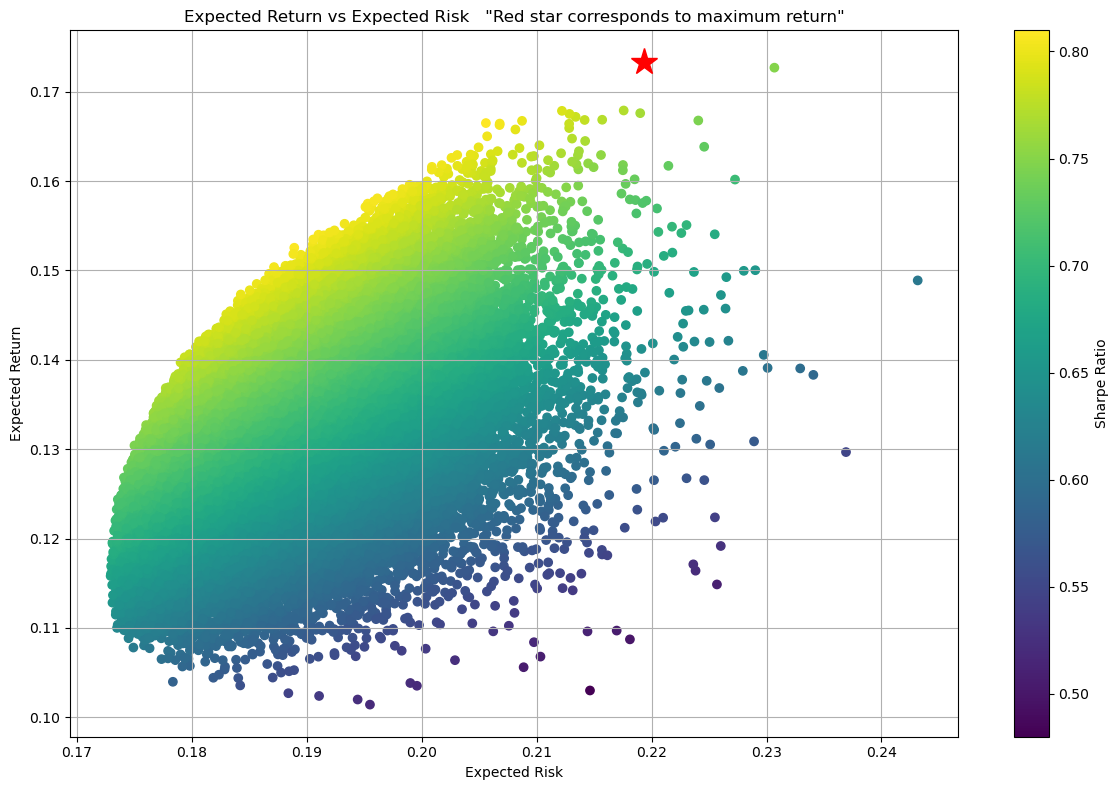

In [30]:
plt.figure(figsize = (12,8)) 
plt.scatter(portfolio_risk, portfolio_returns, c = portfolio_returns/portfolio_risk, marker = "o")
plt.grid(True)
plt.xlabel('Expected Risk')
plt.ylabel('Expected Return')
plt.colorbar(label = "Sharpe Ratio")
plt.plot(portfolio_risk[ind], portfolio_returns[ind], 'r*', markersize = 20.0)
plt.title('Expected Return vs Expected Risk   "Red star corresponds to maximum return"')
plt.tight_layout()

In [31]:
print("Sharpe ratio of the portfolio is", np.round(sharpe_ratios[ind], 5))

Sharpe ratio of the portfolio is 0.79006


In [32]:
print("Expected return of the portfolio is", np.round(portfolio_returns[ind]*100),"%")

Expected return of the portfolio is 17.0 %


In [33]:
print("Expected Risk of the portfolio is", np.round(portfolio_risk[ind], 5))

Expected Risk of the portfolio is 0.21933


In [34]:
print('Stocks with the corresponding weights')
for i in range(len(stocks)):
    print(stocks[i],"-->",np.round(portfolio_weights[ind][i], 5))

Stocks with the corresponding weights
RELIANCE.NS --> 0.035
TCS.NS --> 0.0562
HINDUNILVR.NS --> 0.06286
HDFCBANK.NS --> 0.02625
ITC.NS --> 0.03861
LT.NS --> 0.59991
INFY.NS --> 0.18116
